## Learning Objectives

   
  At the end of the experiment, you will be able to understand about:
  * working with MRI images 
  * how to classify and detect brain tumor with CNN


### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "DHAI-B3-M3_AST_01_Basic_Probability." #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}        
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dhai.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



### Abstract

* A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.

* Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using Convolution-Neural Network (CNN), Artificial Neural Network (ANN), and Transfer-Learning (TL) would be helpful to doctors all around the world.

### Context

* Brain Tumors are complex. There are a lot of abnormalities in the sizes and location of the brain tumor(s). This makes it really difficult for complete understanding of the nature of the tumor. Also, a professional Neurosurgeon is required for MRI analysis. Often times in developing countries the lack of skillful doctors and lack of knowledge about tumors makes it really challenging and time-consuming to generate reports from MRI’. So an automated system on Cloud can solve this problem.

#### Problem Statement

The main aim is to create a model able to distinguish between MRI images of patients affected by a brain tumor and the ones of healthy subjects. To achieve this aim, we will build a Convolutional Neural Network and look into it's prediction.

### Load the data

In [ ]:
!wget https://cdn.extras.talentsprint.com/DHAI/Datasets/Brain_Tumor.zip

--2022-07-07 12:17:54--  https://cdn.extras.talentsprint.com/DHAI/Datasets/Brain_Tumor.zip
Resolving cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)... 172.105.52.210
Connecting to cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17445428 (17M) [application/zip]
Saving to: ‘Brain_Tumor.zip’

Brain_Tumor.zip     100%[===================>]  16.64M  10.6MB/s    in 1.6s    

2022-07-07 12:17:57 (10.6 MB/s) - ‘Brain_Tumor.zip’ saved [17445428/17445428]



Unzipping the downloaded folder.

In [ ]:
!unzip '/content/Brain_Tumor.zip'

### Importing the libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
import torch.optim as optim
from sklearn.utils import shuffle
from PIL import Image
%matplotlib inline

Need to check if cuda is avaiable, to shift tensors and network to GPUs


In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

#### Custom Data Generator

A lot of effort in solving any machine learning problem goes into preparing the data. PyTorch provides many tools to make data loading easy and hopefully, to make your code more readable. In this tutorial, we will see how to load and preprocess/augment data from a non trivial dataset.

torch.utils.data.Dataset is an abstract class representing a dataset. Your custom dataset should inherit Dataset and override the following methods:

`__len__` so that len(dataset) returns the size of the dataset.
`__getitem__` to support the indexing such that dataset[ i ] can be used to get ith sample.

In [ ]:
from glob import glob
class BrainMRIDataset(Dataset):
    
    def __init__(self,data_dir,reshape=True,height=128,width=128,autoencoder=False):
        self.dataDirectory = data_dir
        self.no_class = glob(data_dir+'/no/*')
        self.yes_class = glob(data_dir+'/yes/*')
        self.height = height
        self.width = width
        self.reshape=reshape
        self.autoencoder = autoencoder
        
        labels = [0 for i in range(len(self.no_class))]
        labels += [1 for i in range(len(self.yes_class))]
        
        image_links = self.no_class + self.yes_class
        self.dataframe = pd.DataFrame({
            'image':image_links,
            'labels': labels
        })
        
        self.dataframe = shuffle(self.dataframe)
        self.dataframe.reset_index(inplace=True,drop=True)
        
    def __len__(self):
        return len(self.no_class)+len(self.yes_class)
    
    def __getitem__(self,idx):
        
        image_list = self.dataframe['image'][idx]
        label_list = self.dataframe['labels'][idx]
        
        if type(image_list) == str:
            image_list = [image_list]

        if not isinstance(label_list,np.int64):
            label_list = label_list.values

        image_array = []
        for image in image_list:
            image = Image.open(image).convert("L")
            if self.reshape:
                image = image.resize((self.height,self.width))

            array = np.asarray(image)
        
            if self.autoencoder:
                array = array.reshape(self.height*self.width)
            else:
                array = array.reshape(1,self.height,self.width)
            
            image_array.append(array)
        
        return [torch.tensor(image_array,device=device),torch.tensor(label_list,device=device)]
    
    def __repr__(self):
        return str(self.dataframe.head())

Let us have a look at data with image links and labels.

In [ ]:
dataset = BrainMRIDataset("/content/Brain_Tumor/brain_tumor_dataset")
print(dataset)

                                               image  labels
0  /content/Brain_Tumor/brain_tumor_dataset/yes/Y...       1
1  /content/Brain_Tumor/brain_tumor_dataset/yes/Y...       1
2  /content/Brain_Tumor/brain_tumor_dataset/yes/Y...       1
3  /content/Brain_Tumor/brain_tumor_dataset/yes/Y...       1
4  /content/Brain_Tumor/brain_tumor_dataset/yes/Y...       1


#### Custom Neural Network Class

This class will inherit the properties from torch.nn.Module and should have two functions `__init__` for defining neural network and forward for forward propogation. In General, forward function, will be dealing with output from each layer. We can apply MaxPool, Dropouts and other activation functions.

In [ ]:
class BrainTumorModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1,256,kernel_size=3),
            nn.MaxPool2d(2,2),
            nn.Conv2d(256,32,kernel_size=2)
        )
        self.linear1 = nn.Linear(62,128)
        self.linear2 = nn.Linear(128,64)
        self.flat = nn.Flatten(1)
        self.linear3 = nn.Linear(126976,2)

    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        x = self.flat(x)
        x = self.linear3(x)

        return x

Let us have a look at the model.

In [ ]:
model = BrainTumorModel()
model.to(device)

BrainTumorModel(
  (conv1): Sequential(
    (0): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(256, 32, kernel_size=(2, 2), stride=(1, 1))
  )
  (linear1): Linear(in_features=62, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (linear3): Linear(in_features=126976, out_features=2, bias=True)
)

### Convolutional Neural Network - Classification
#### Model Training

1. **Loss Function**: torch.nn Module having predefined loss functions and you can create your own Loss functions as defined above. Using CrossEntropyLoss for 2 Outputs, for examining the individual probabilities

2. **Optimizer**: torch.nn having pre-defined optimizers, with many parameters, using Adam here

3. After defining epochs, need to loop over some steps:

 *   Fitting Data with batch of dataset
 *   Compute the Loss
 *   Make Gradient Zero, for previous computations
 *   Compute the backward propogation (Derivate calculation)
 *   Optimizing the weight and biases

In [ ]:
# Defining the loss and the optimizer for the model
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

Further, let us train the model and check the loss.

In [ ]:
epochs = 200
batch_size = 32
loss_list = []
for epoch in range(epochs):
    total_loss = 0
    for n in range(len(dataset)//batch_size):
    
        data,target = dataset[n*batch_size:(n+1)*batch_size]

        ypred = model.forward(data.float())
        loss = loss_fn(ypred,target)

        total_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
  
    loss_list.append(total_loss/batch_size)
    if epoch%10 == 0:
        print(f'Epochs: {epoch} Loss: {total_loss/n}')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)


Epochs: 0 Loss: 23.181861877441406
Epochs: 10 Loss: 0.7976508140563965
Epochs: 20 Loss: 0.3895784318447113
Epochs: 30 Loss: 0.26274755597114563
Epochs: 40 Loss: 0.16015295684337616
Epochs: 50 Loss: 0.12664680182933807
Epochs: 60 Loss: 0.11436116695404053
Epochs: 70 Loss: 0.10630181431770325
Epochs: 80 Loss: 0.09599616378545761
Epochs: 90 Loss: 0.07329479604959488
Epochs: 100 Loss: 0.06080297753214836
Epochs: 110 Loss: 0.0513521172106266
Epochs: 120 Loss: 0.03990516811609268
Epochs: 130 Loss: 0.028600865975022316
Epochs: 140 Loss: 0.021905524656176567
Epochs: 150 Loss: 0.018743271008133888
Epochs: 160 Loss: 0.017588919028639793
Epochs: 170 Loss: 0.016980091109871864
Epochs: 180 Loss: 0.016610577702522278
Epochs: 190 Loss: 0.016339169815182686


Here, we can observe that after 200 epochs, the loss is reduced to negligible.

#### Results

Finally, checking the predictions of the model through the image.

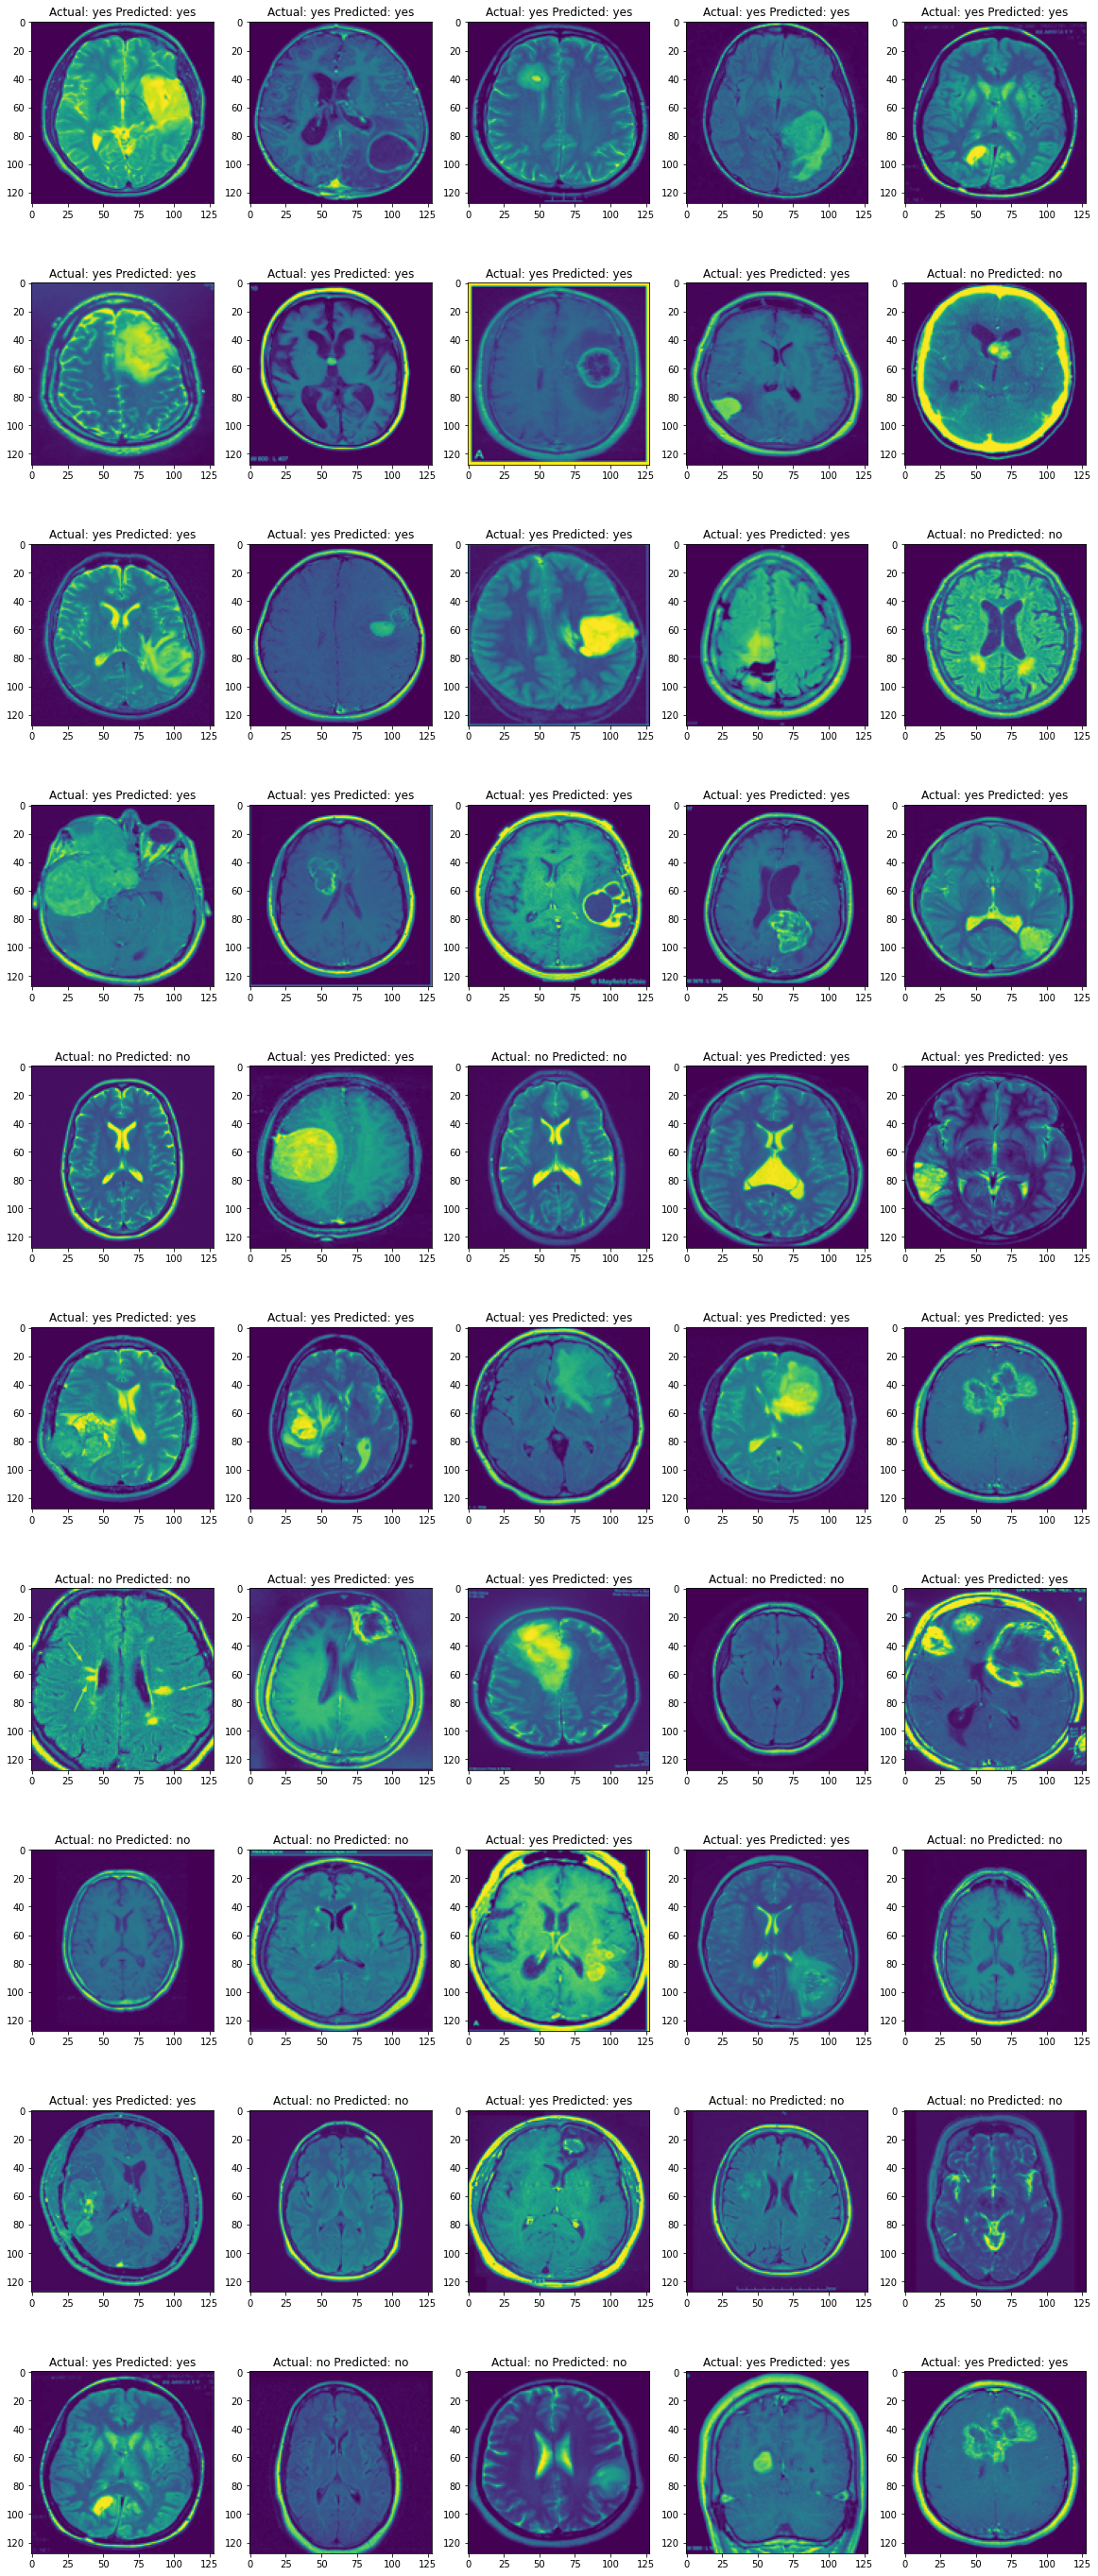

In [ ]:
mapping = {0:'no',1:'yes'}
fig = plt.figure(figsize=(20,50))
for i in range(50):
    data,target = dataset[i]
    pred = model.forward(data.float())
    pred = torch.argmax(pred,dim=1)
    plt.subplot(10,5,i+1)
    plt.imshow(data[0][0].cpu())
    plt.title(f'Actual: {mapping[target.cpu().detach().item()]} Predicted: {mapping[pred.cpu().detach().item()]}')
plt.show()